In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


/Users/amin/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_excel("National_Accidents_Australia.xlsx")

In [3]:
data['Died_cases'].fillna(0, inplace=True)

data['Died_bed_days'].fillna(0, inplace=True)

data.dropna(subset=['Count of cases'], inplace=True)


data.head()

,Calendar year,Month,ABS remoteness area,Cause of injury,Age group,Sex,Road user,Counterparty,Count of cases,Bed days,Died_cases,Died_bed_days,Hospitalisations
0,2011,April,Major Cities,All other trauma events,0-7,Female,Not applicable,Not applicable,765.0,1007,0.0,0.0,765
1,2011,April,Major Cities,All other trauma events,0-7,Male,Not applicable,Not applicable,1010.0,1694,0.0,0.0,1010
2,2011,April,Major Cities,All other trauma events,17-25,Female,Not applicable,Not applicable,859.0,1597,0.0,0.0,859
3,2011,April,Major Cities,All other trauma events,17-25,Male,Not applicable,Not applicable,2231.0,3878,2.0,3.0,2229
4,2011,April,Major Cities,All other trauma events,26-39,Female,Not applicable,Not applicable,1098.0,2347,1.0,14.0,1097


In [4]:
for column in data.columns:
    unique_values = data[column].unique()
    print(f"ستون {column} دارای مقادیر: {unique_values}")


ستون Calendar year دارای مقادیر: [2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021]
ستون Month دارای مقادیر: ['April' 'August' 'December' 'February' 'January' 'July' 'June' 'March'
 'May' 'November' 'October' 'September']
ستون ABS remoteness area دارای مقادیر: ['Major Cities' 'Missing' 'Regional' 'Remote']
ستون Cause of injury دارای مقادیر: ['All other trauma events' 'Medical events' 'Non-traffic'
 'Other transport' 'Traffic' 'Unknown traffic']
ستون Age group دارای مقادیر: ['0-7' '17-25' '26-39' '40-64' '65-74' '75+' '8-16' 'Missing']
ستون Sex دارای مقادیر: ['Female' 'Male' 'intersex or indeterminate or missing']
ستون Road user دارای مقادیر: ['Not applicable' 'Car passenger' 'Car unknown position'
 'Heavy transport passenger' 'Pedal cyclist' 'Pedestrian' 'Motorcyclist'
 'Bus occupant' 'Car driver' 'Other or unknown'
 'Pick-up truck or van occupant' 'Heavy transport driver'
 'Heavy transport unknown position']
ستون Counterparty دارای مقادیر: ['Not applicable' 'Car, pick-up truck o

In [5]:
data.head()

,Calendar year,Month,ABS remoteness area,Cause of injury,Age group,Sex,Road user,Counterparty,Count of cases,Bed days,Died_cases,Died_bed_days,Hospitalisations
0,2011,April,Major Cities,All other trauma events,0-7,Female,Not applicable,Not applicable,765.0,1007,0.0,0.0,765
1,2011,April,Major Cities,All other trauma events,0-7,Male,Not applicable,Not applicable,1010.0,1694,0.0,0.0,1010
2,2011,April,Major Cities,All other trauma events,17-25,Female,Not applicable,Not applicable,859.0,1597,0.0,0.0,859
3,2011,April,Major Cities,All other trauma events,17-25,Male,Not applicable,Not applicable,2231.0,3878,2.0,3.0,2229
4,2011,April,Major Cities,All other trauma events,26-39,Female,Not applicable,Not applicable,1098.0,2347,1.0,14.0,1097


In [6]:
data.shape

(112982, 13)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112982 entries, 0 to 117918
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Calendar year        112982 non-null  int64  
 1   Month                112982 non-null  object 
 2   ABS remoteness area  112982 non-null  object 
 3   Cause of injury      112982 non-null  object 
 4   Age group            112982 non-null  object 
 5   Sex                  112982 non-null  object 
 6   Road user            112982 non-null  object 
 7   Counterparty         112982 non-null  object 
 8   Count of cases       112982 non-null  float64
 9   Bed days             112982 non-null  int64  
 10  Died_cases           112982 non-null  float64
 11  Died_bed_days        112982 non-null  float64
 12  Hospitalisations     112982 non-null  int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 12.1+ MB


In [8]:
data.describe()

,Calendar year,Count of cases,Bed days,Died_cases,Died_bed_days,Hospitalisations
count,112982.000000,112982.000000,112982.000000,112982.000000,112982.000000,112982.000000
mean,2016.044777,913.243499,2469.863642,3.695863,35.828220,909.547636
std,3.148345,6227.102077,16190.393778,38.471092,372.800403,6203.264678
min,2011.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2013.000000,1.000000,2.000000,0.000000,0.000000,1.000000
50%,2016.000000,3.000000,10.000000,0.000000,0.000000,3.000000
75%,2019.000000,12.000000,55.000000,0.000000,0.000000,12.000000
max,2021.000000,107434.000000,252872.000000,996.000000,9107.000000,107434.000000


In [9]:
data.head()

,Calendar year,Month,ABS remoteness area,Cause of injury,Age group,Sex,Road user,Counterparty,Count of cases,Bed days,Died_cases,Died_bed_days,Hospitalisations
0,2011,April,Major Cities,All other trauma events,0-7,Female,Not applicable,Not applicable,765.0,1007,0.0,0.0,765
1,2011,April,Major Cities,All other trauma events,0-7,Male,Not applicable,Not applicable,1010.0,1694,0.0,0.0,1010
2,2011,April,Major Cities,All other trauma events,17-25,Female,Not applicable,Not applicable,859.0,1597,0.0,0.0,859
3,2011,April,Major Cities,All other trauma events,17-25,Male,Not applicable,Not applicable,2231.0,3878,2.0,3.0,2229
4,2011,April,Major Cities,All other trauma events,26-39,Female,Not applicable,Not applicable,1098.0,2347,1.0,14.0,1097


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112982 entries, 0 to 117918
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Calendar year        112982 non-null  int64  
 1   Month                112982 non-null  object 
 2   ABS remoteness area  112982 non-null  object 
 3   Cause of injury      112982 non-null  object 
 4   Age group            112982 non-null  object 
 5   Sex                  112982 non-null  object 
 6   Road user            112982 non-null  object 
 7   Counterparty         112982 non-null  object 
 8   Count of cases       112982 non-null  float64
 9   Bed days             112982 non-null  int64  
 10  Died_cases           112982 non-null  float64
 11  Died_bed_days        112982 non-null  float64
 12  Hospitalisations     112982 non-null  int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 12.1+ MB


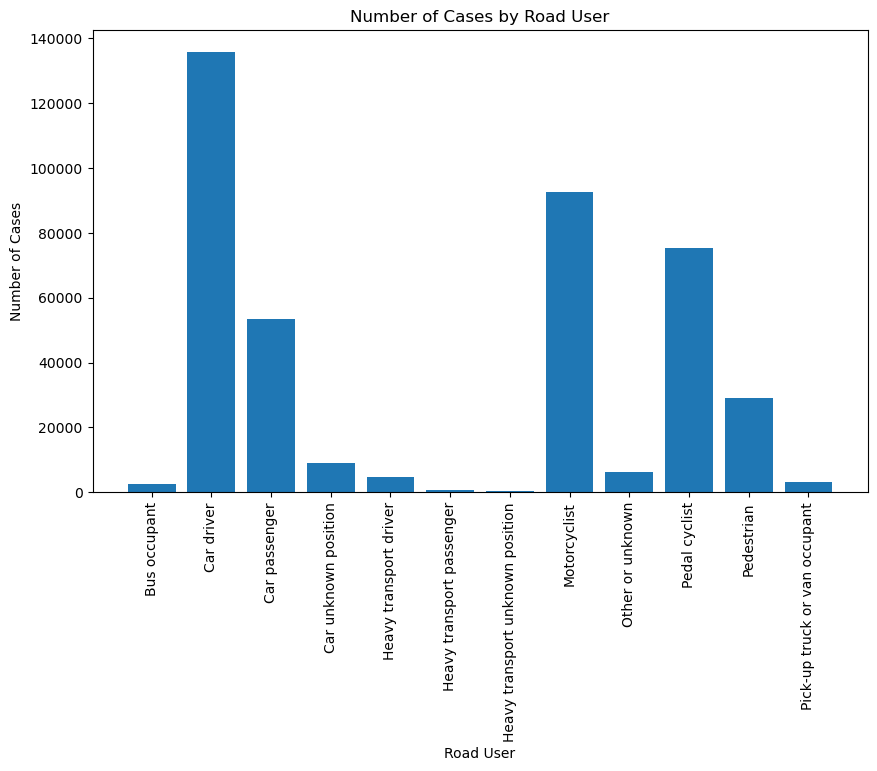

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

road_user_counts = data[data['Road user'] != 'Not applicable'].groupby('Road user')['Count of cases'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(road_user_counts['Road user'], road_user_counts['Count of cases'])
plt.xticks(rotation=90)
plt.xlabel('Road User')
plt.ylabel('Number of Cases')
plt.title('Number of Cases by Road User')
plt.show()

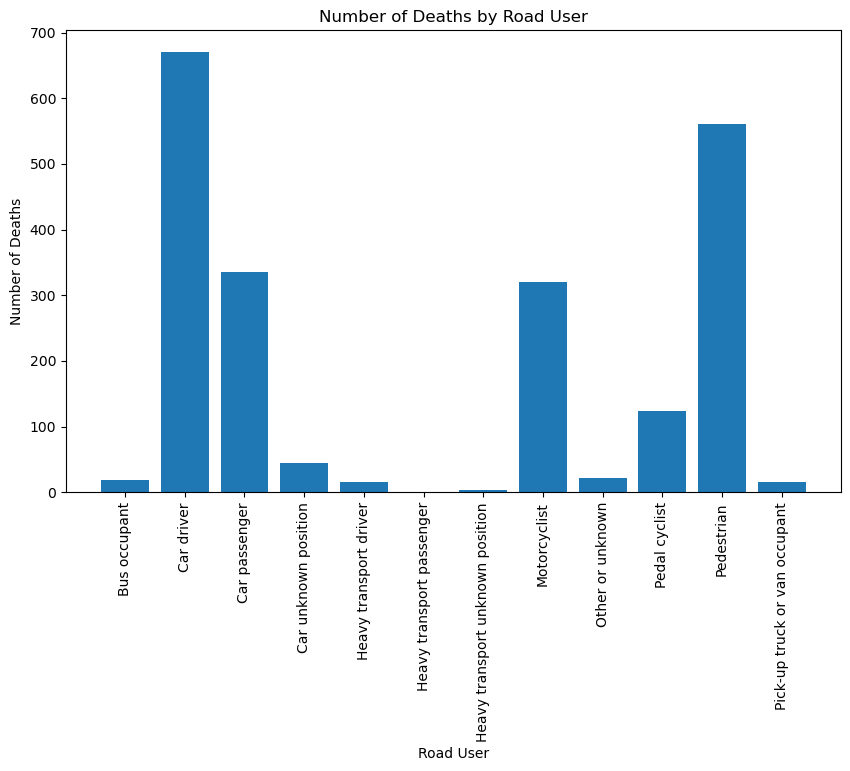

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# فرض می‌کنیم که داده‌ها در یک دیتافریم به نام data قرار دارند
died_cases_by_road_user = data[(data['Died_cases'] > 0) & (data['Road user'] != 'Not applicable')].groupby('Road user')['Died_cases'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(died_cases_by_road_user['Road user'], died_cases_by_road_user['Died_cases'])
plt.xticks(rotation=90)
plt.xlabel('Road User')
plt.ylabel('Number of Deaths')
plt.title('Number of Deaths by Road User')
plt.show()

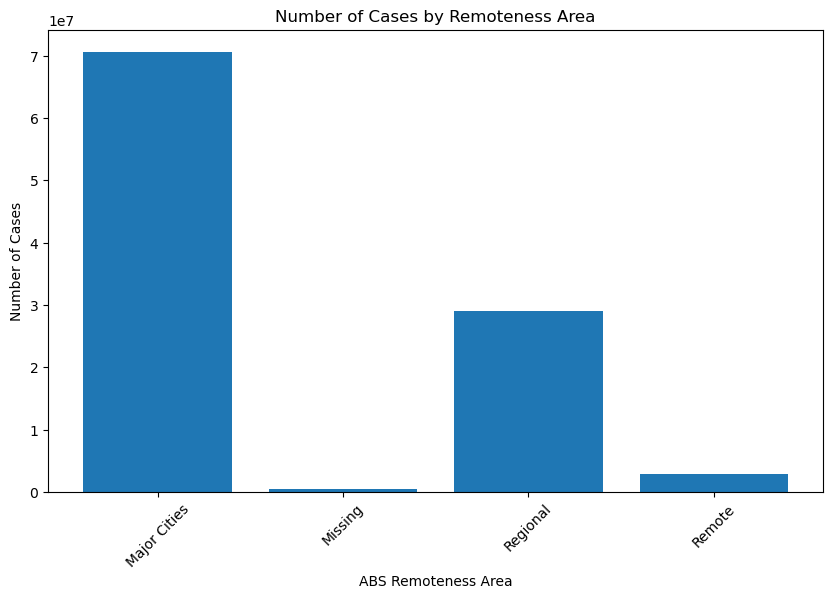

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# فرض می‌کنیم که داده‌ها در یک دیتافریم به نام data قرار دارند
cases_by_area = data.groupby('ABS remoteness area')['Count of cases'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(cases_by_area['ABS remoteness area'], cases_by_area['Count of cases'])
plt.xticks(rotation=45)
plt.xlabel('ABS Remoteness Area')
plt.ylabel('Number of Cases')
plt.title('Number of Cases by Remoteness Area')
plt.show()

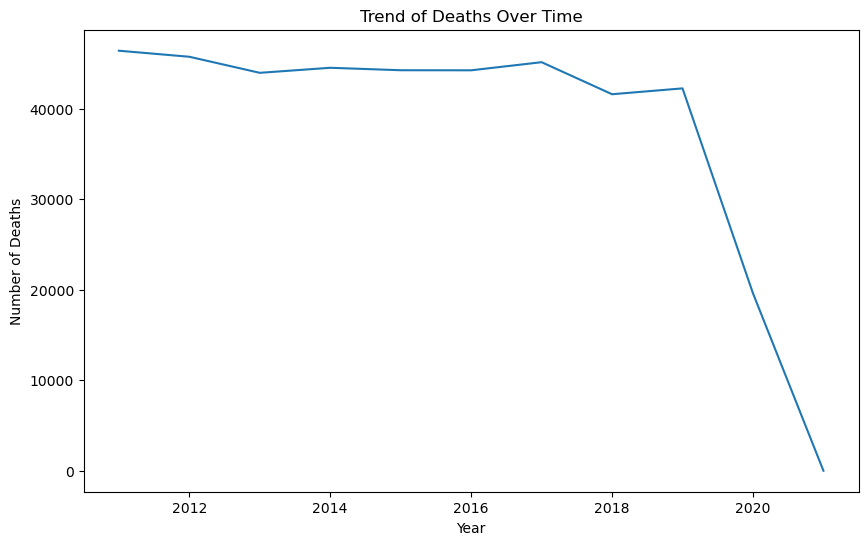

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# فرض می‌کنیم که داده‌ها در یک دیتافریم به نام data قرار دارند
deaths_by_year = data.groupby('Calendar year')['Died_cases'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(deaths_by_year['Calendar year'], deaths_by_year['Died_cases'])
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.title('Trend of Deaths Over Time')
plt.show()

In [15]:
import pandas as pd

# فرض می‌کنیم که داده‌ها در یک دیتافریم به نام data قرار دارند

# محاسبه تعداد کل روزهای بستری
total_bed_days = data['Bed days'].sum()

# محاسبه تعداد کل روزهای بستری برای موارد منجر به فوت
total_died_bed_days = data['Died_bed_days'].sum()

# محاسبه تعداد کل موارد بستری
total_hospitalizations = data['Hospitalisations'].sum()

# فرض می‌کنیم که هزینه متوسط هر روز بستری برابر با 1000 دلار است
avg_bed_day_cost = 1000

# محاسبه هزینه کل روزهای بستری
total_bed_day_cost = total_bed_days * avg_bed_day_cost

# فرض می‌کنیم که هزینه متوسط هر مورد بستری برابر با 10000 دلار است
avg_hospitalization_cost = 10000

# محاسبه هزینه کل موارد بستری
total_hospitalization_cost = total_hospitalizations * avg_hospitalization_cost

# محاسبه هزینه کل ناشی از حوادث و آسیب‌ها
total_cost = total_bed_day_cost + total_hospitalization_cost

print(f"Total Bed Days: {total_bed_days}")
print(f"Total Died Bed Days: {total_died_bed_days}")
print(f"Total Hospitalizations: {total_hospitalizations}")
print(f"Total Bed Day Cost: ${total_bed_day_cost:,.2f}")
print(f"Total Hospitalization Cost: ${total_hospitalization_cost:,.2f}")
print(f"Total Cost: ${total_cost:,.2f}")

Total Bed Days: 279050134
Total Died Bed Days: 4047944.0
Total Hospitalizations: 102762511
Total Bed Day Cost: $279,050,134,000.00
Total Hospitalization Cost: $1,027,625,110,000.00
Total Cost: $1,306,675,244,000.00


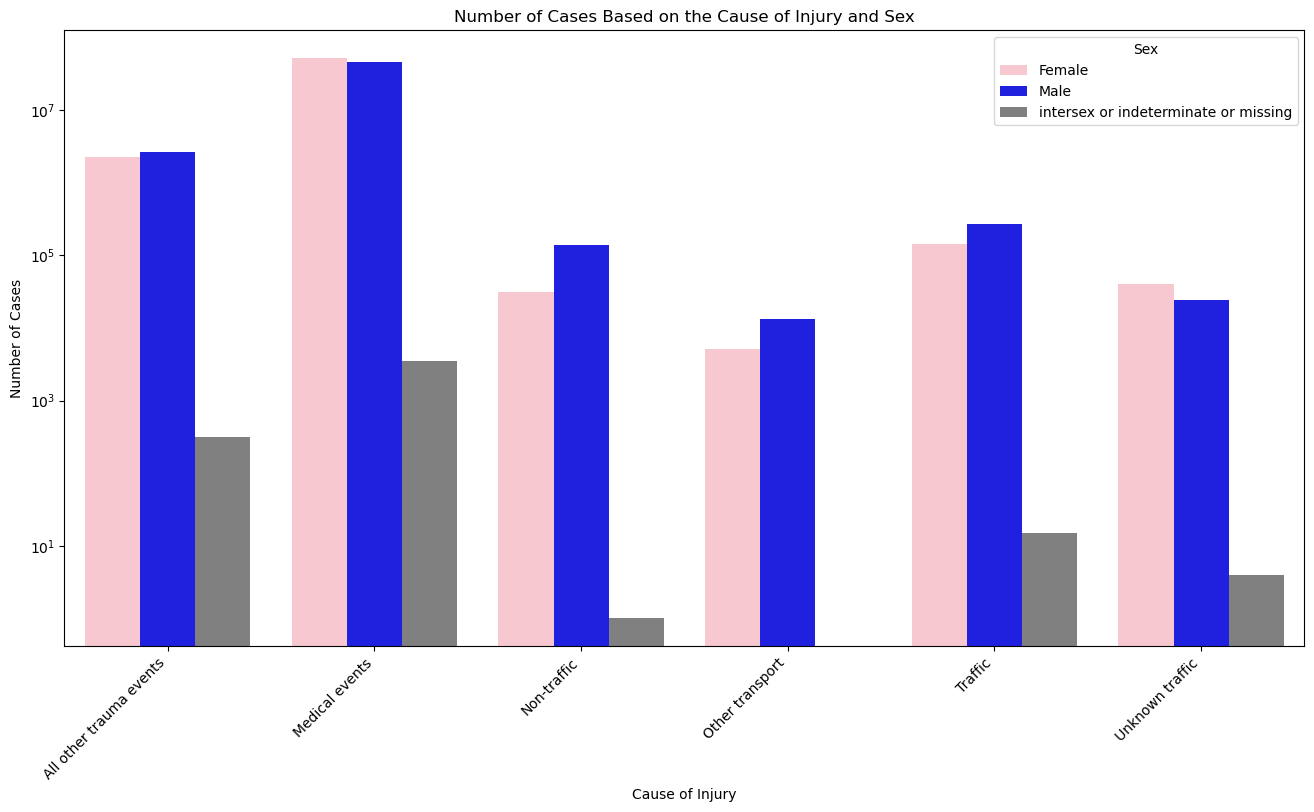

In [16]:
colors = {'Female': 'pink', 'Male': 'blue', 'intersex or indeterminate or missing': 'gray'}

plt.figure(figsize=(16, 8))
sns.barplot(x='Cause of injury', y='Count of cases', hue='Sex', data=data, ci=None,palette=colors, estimator=sum)
plt.title('Number of Cases Based on the Cause of Injury and Sex')
plt.xlabel('Cause of Injury')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45, ha='right')
plt.yscale('log')  
plt.show()


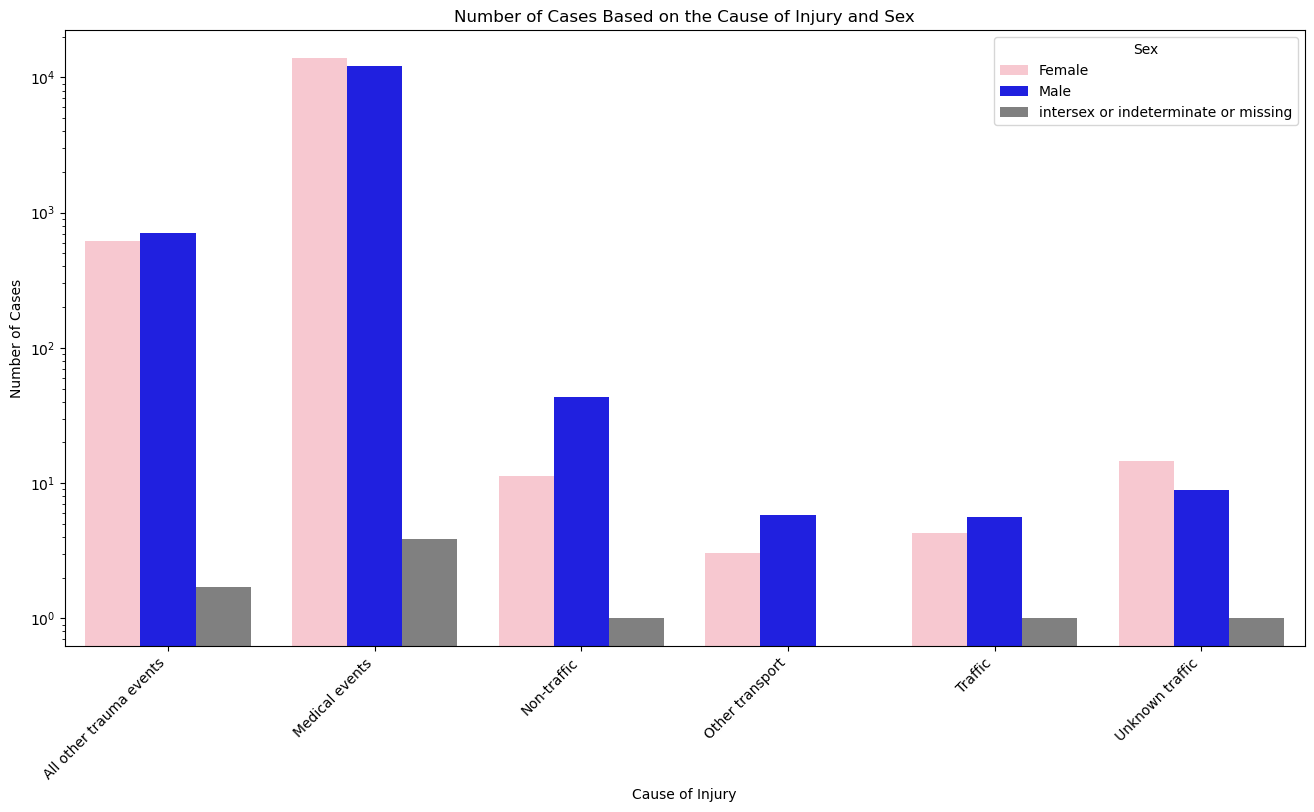

In [17]:
colors = {'Female': 'pink', 'Male': 'blue', 'intersex or indeterminate or missing': 'gray'}

plt.figure(figsize=(16, 8))
sns.barplot(x='Cause of injury', y='Count of cases', hue='Sex', data=data, ci=None,palette=colors)
plt.title('Number of Cases Based on the Cause of Injury and Sex')
plt.xlabel('Cause of Injury')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45, ha='right')
plt.yscale('log')  
plt.show()


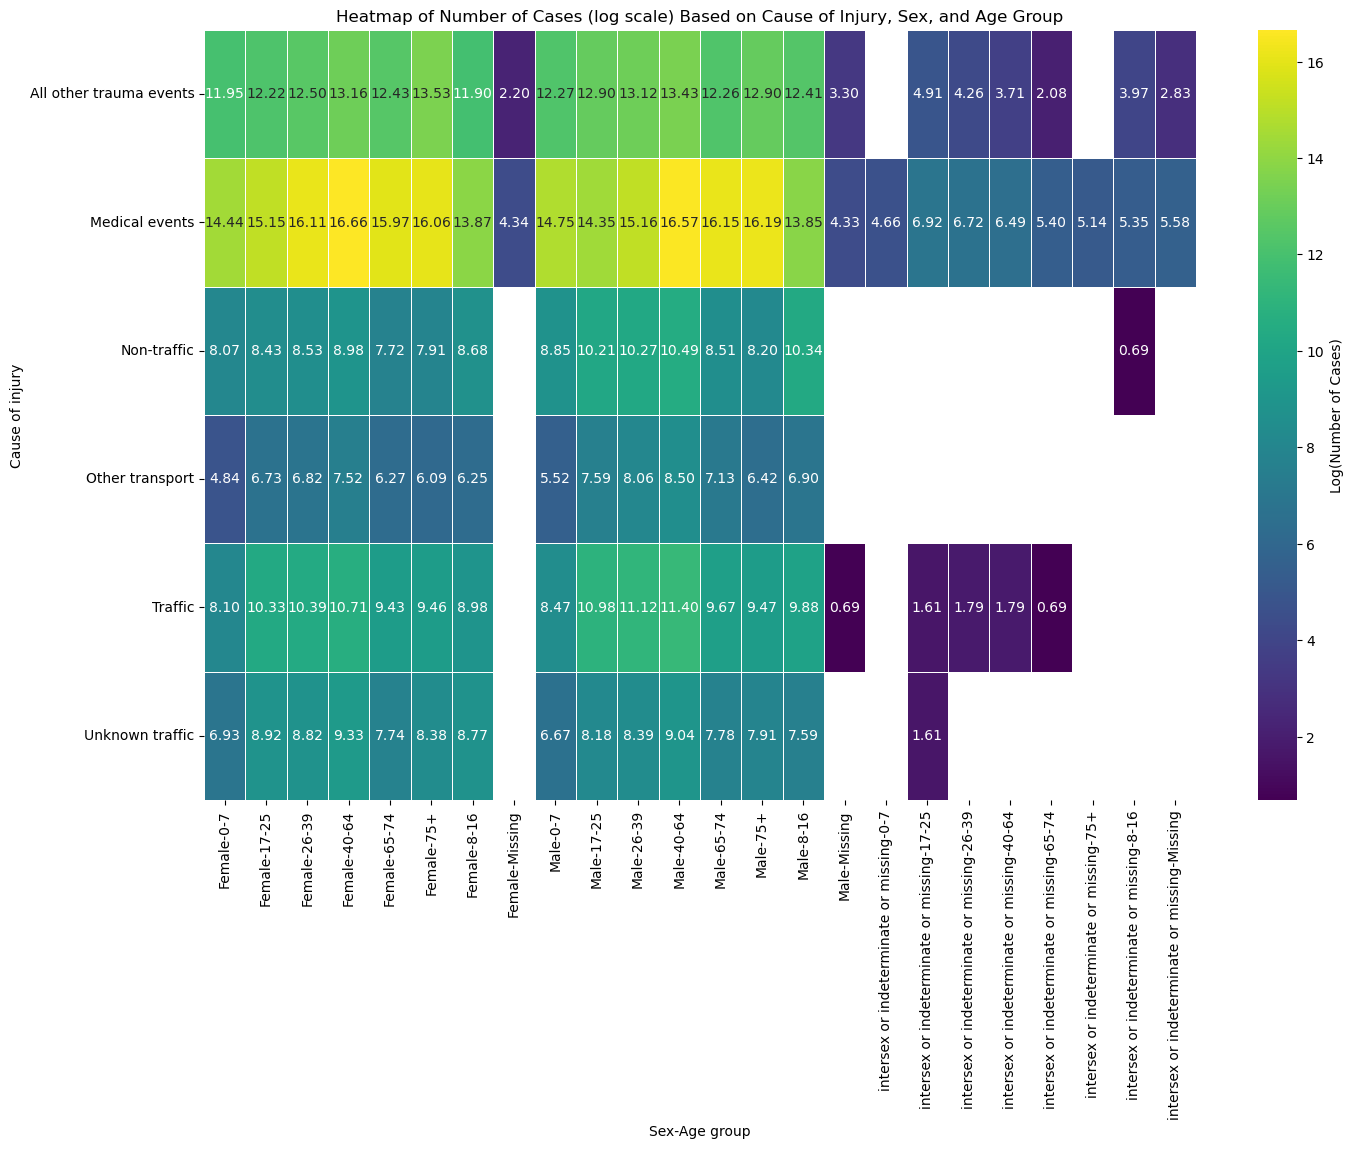

In [18]:

plt.figure(figsize=(16, 10))
heatmap_data = data.pivot_table(index='Cause of injury', columns=['Sex', 'Age group'], values='Count of cases', aggfunc='sum')
heatmap_data = np.log1p(heatmap_data)  
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='.2f', linewidths=.5, cbar_kws={'label': 'Log(Number of Cases)'})
plt.title('Heatmap of Number of Cases (log scale) Based on Cause of Injury, Sex, and Age Group')
plt.show()



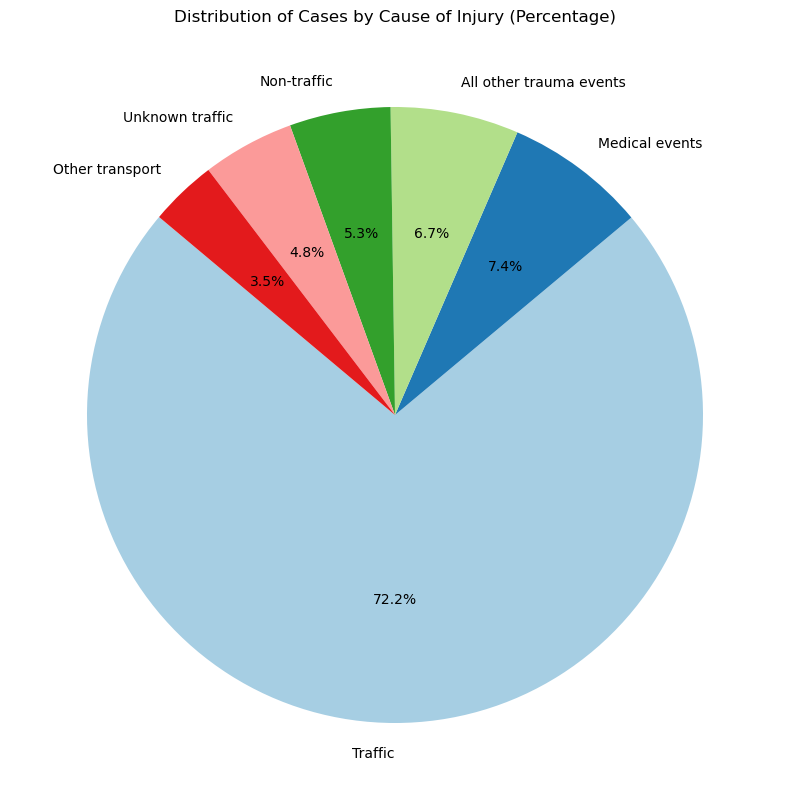

In [19]:

plt.figure(figsize=(10, 10))
cause_counts = data['Cause of injury'].value_counts()
plt.pie(cause_counts, labels=cause_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Cases by Cause of Injury (Percentage)')
plt.show()


In [20]:
cases_count = data.groupby(['Cause of injury', 'Sex'])['Count of cases'].sum()
print(cases_count)




Cause of injury          Sex                                 
All other trauma events  Female                                   2296874.0
                         Male                                     2649046.0
                         intersex or indeterminate or missing         319.0
Medical events           Female                                  51786715.0
                         Male                                    45778020.0
                         intersex or indeterminate or missing        3465.0
Non-traffic              Female                                     31679.0
                         Male                                      138555.0
                         intersex or indeterminate or missing           1.0
Other transport          Female                                      5210.0
                         Male                                       13164.0
Traffic                  Female                                    144754.0
                         M

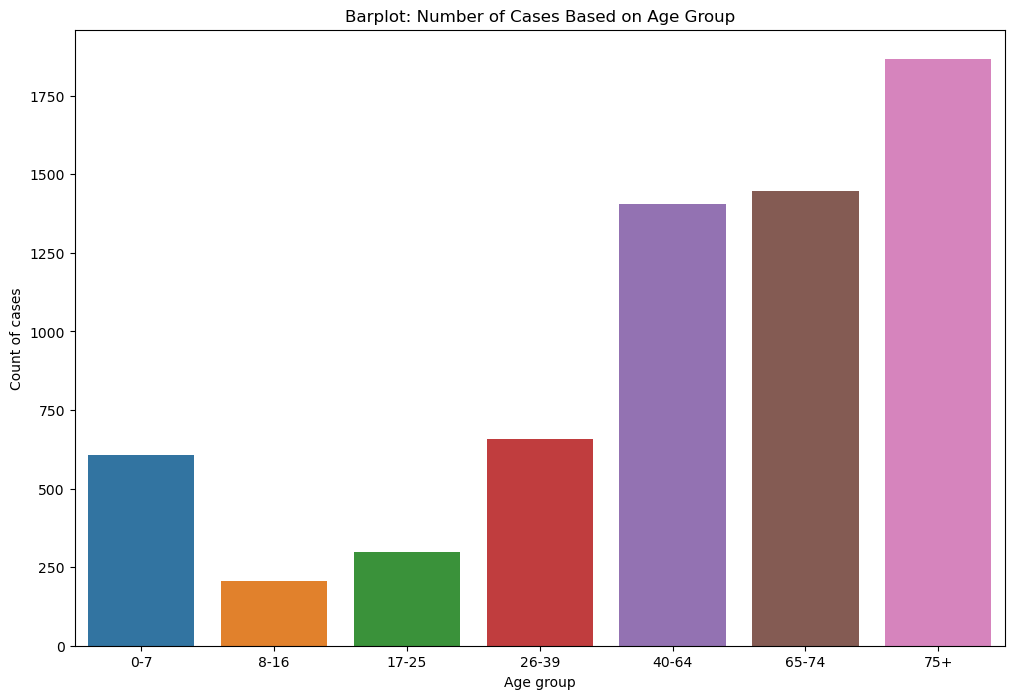

In [21]:

age_order = ['0-7', '8-16', '17-25', '26-39', '40-64', '65-74', '75+']

plt.figure(figsize=(12, 8))
sns.barplot(x='Age group', y='Count of cases', data=data , order=age_order , ci=None ,)
plt.title('Barplot: Number of Cases Based on Age Group')
plt.show()



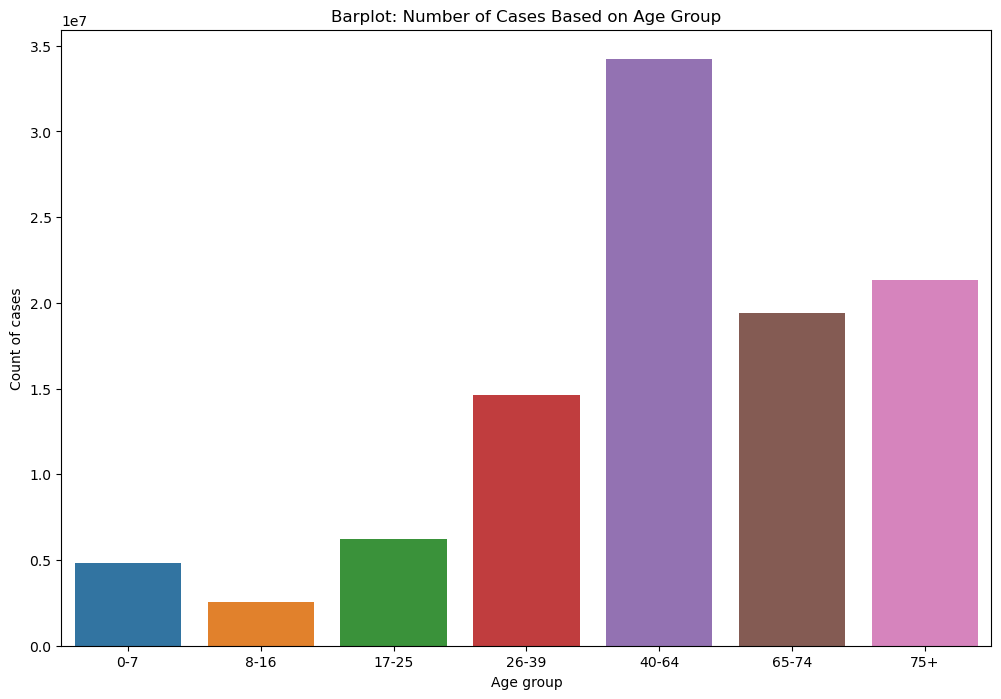

In [22]:

age_order = ['0-7', '8-16', '17-25', '26-39', '40-64', '65-74', '75+']

plt.figure(figsize=(12, 8))
sns.barplot(x='Age group', y='Count of cases', data=data , order=age_order , ci=None , estimator=sum)
plt.title('Barplot: Number of Cases Based on Age Group')
plt.show()



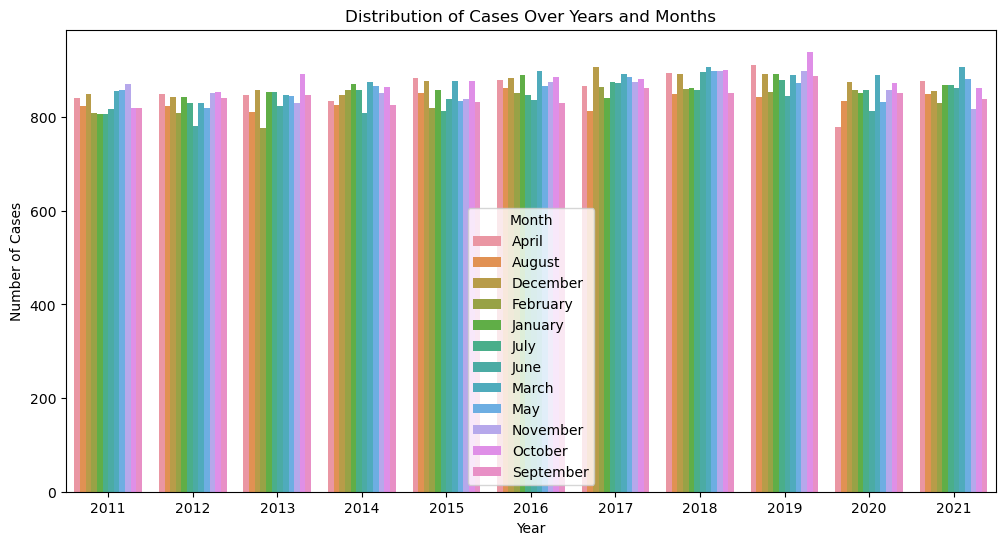

In [23]:

plt.figure(figsize=(12, 6))
sns.countplot(x='Calendar year', hue='Month', data=data)
plt.title('Distribution of Cases Over Years and Months')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.show()


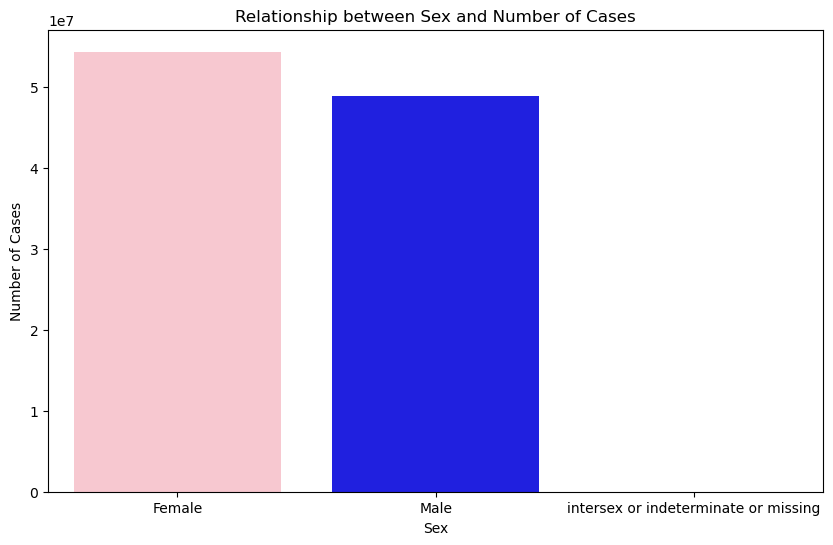

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Count of cases', data=data ,palette=colors, ci=None ,estimator=sum)
plt.title('Relationship between Sex and Number of Cases')
plt.xlabel('Sex')
plt.ylabel('Number of Cases')
plt.show()
#s

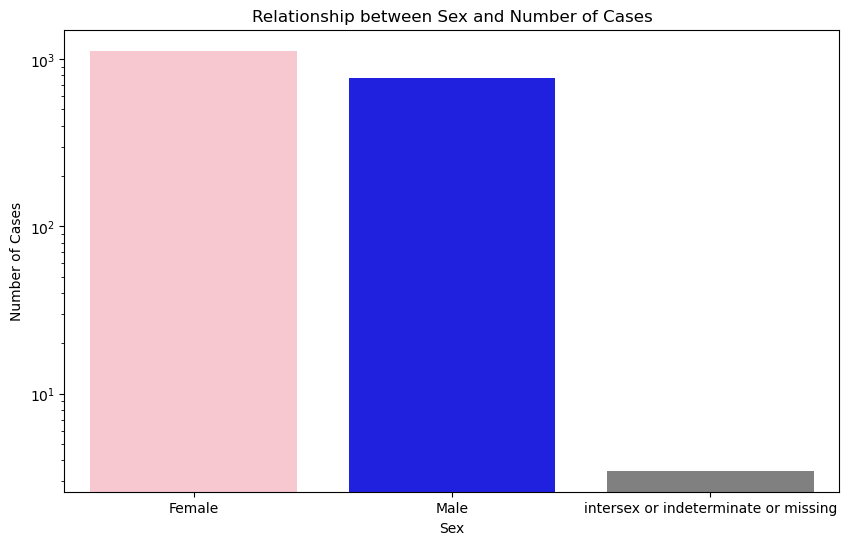

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Count of cases', data=data ,palette=colors, ci=None )
plt.title('Relationship between Sex and Number of Cases')
plt.xlabel('Sex')
plt.ylabel('Number of Cases')
plt.yscale('log')
plt.show()
#s

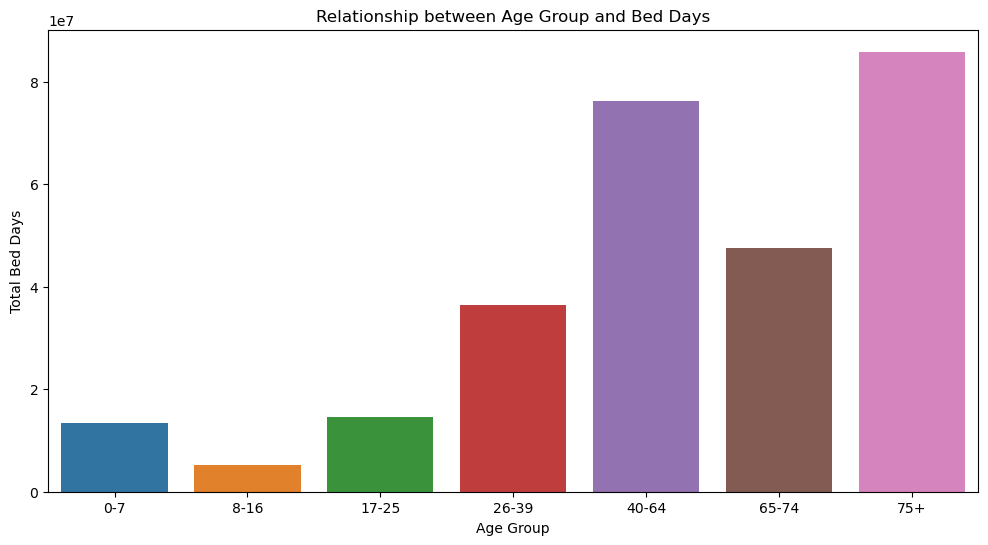

In [26]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Age group', y='Bed days', data=data , ci=None ,order=age_order, estimator=sum)
plt.title('Relationship between Age Group and Bed Days')
plt.xlabel('Age Group')
plt.ylabel('Total Bed Days')
plt.show()


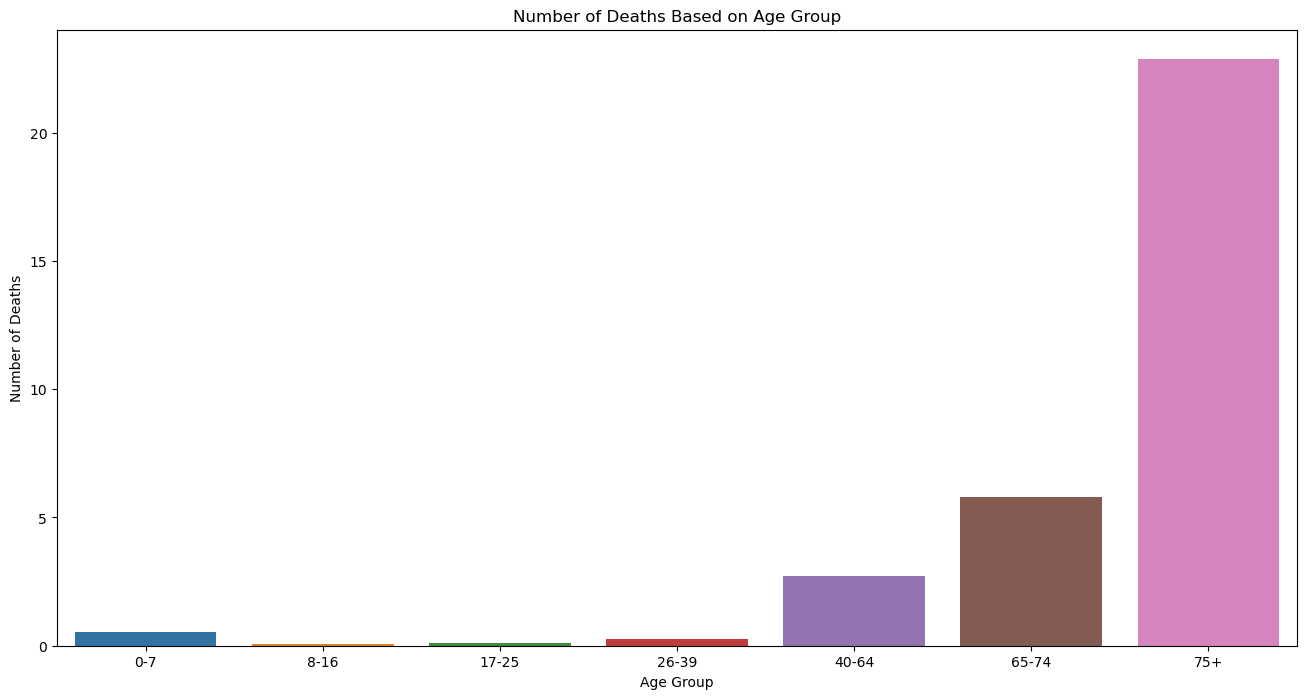

In [27]:

plt.figure(figsize=(16, 8))
sns.barplot(x='Age group', y='Died_cases', data=data, ci=None,order=age_order)
plt.title('Number of Deaths Based on Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Deaths')
plt.show()


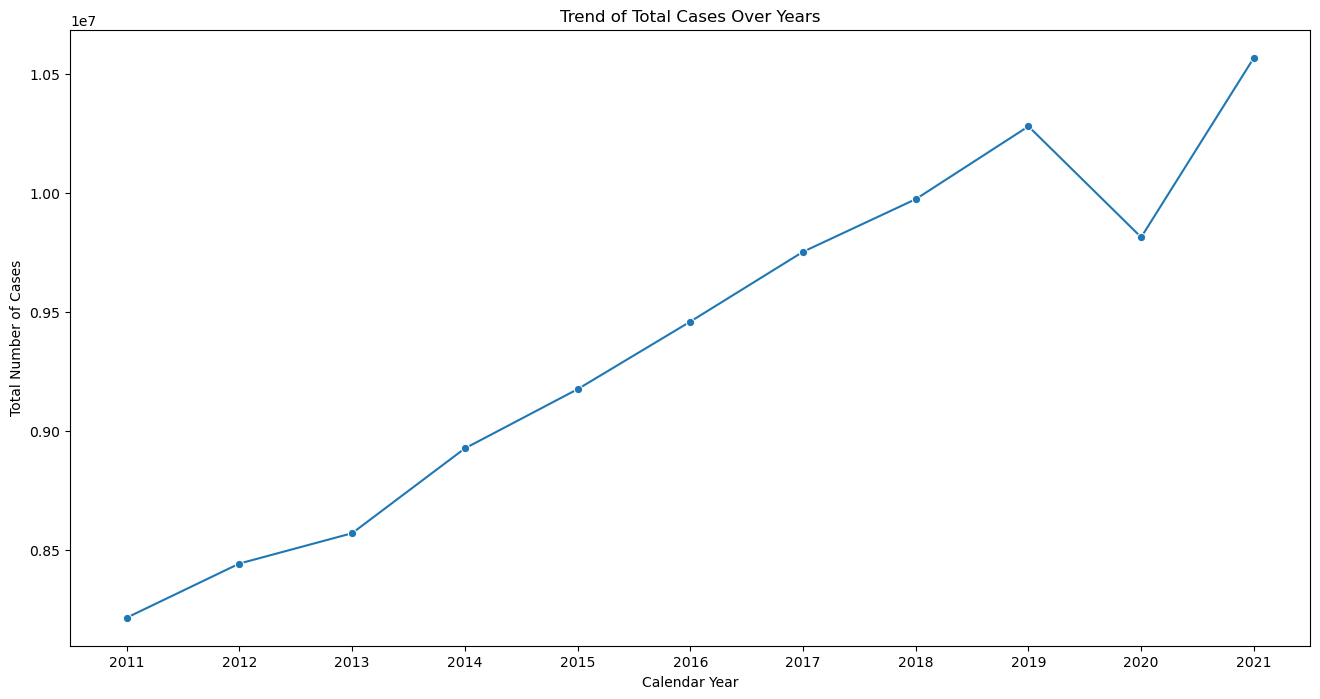

In [28]:

total_cases_per_year = data.groupby('Calendar year')['Count of cases'].sum().reset_index()

plt.figure(figsize=(16, 8))
sns.lineplot(x='Calendar year', y='Count of cases', data=total_cases_per_year, marker='o')
plt.title('Trend of Total Cases Over Years')
plt.xlabel('Calendar Year')
plt.ylabel('Total Number of Cases')

plt.xticks(total_cases_per_year['Calendar year'])
plt.show()


# clean Data for Learn

In [29]:
data['Died_cases'].fillna(0, inplace=True)

data['Died_bed_days'].fillna(0, inplace=True)

data.dropna(subset=['Count of cases'], inplace=True)


data.head()

,Calendar year,Month,ABS remoteness area,Cause of injury,Age group,Sex,Road user,Counterparty,Count of cases,Bed days,Died_cases,Died_bed_days,Hospitalisations
0,2011,April,Major Cities,All other trauma events,0-7,Female,Not applicable,Not applicable,765.0,1007,0.0,0.0,765
1,2011,April,Major Cities,All other trauma events,0-7,Male,Not applicable,Not applicable,1010.0,1694,0.0,0.0,1010
2,2011,April,Major Cities,All other trauma events,17-25,Female,Not applicable,Not applicable,859.0,1597,0.0,0.0,859
3,2011,April,Major Cities,All other trauma events,17-25,Male,Not applicable,Not applicable,2231.0,3878,2.0,3.0,2229
4,2011,April,Major Cities,All other trauma events,26-39,Female,Not applicable,Not applicable,1098.0,2347,1.0,14.0,1097


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112982 entries, 0 to 117918
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Calendar year        112982 non-null  int64  
 1   Month                112982 non-null  object 
 2   ABS remoteness area  112982 non-null  object 
 3   Cause of injury      112982 non-null  object 
 4   Age group            112982 non-null  object 
 5   Sex                  112982 non-null  object 
 6   Road user            112982 non-null  object 
 7   Counterparty         112982 non-null  object 
 8   Count of cases       112982 non-null  float64
 9   Bed days             112982 non-null  int64  
 10  Died_cases           112982 non-null  float64
 11  Died_bed_days        112982 non-null  float64
 12  Hospitalisations     112982 non-null  int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 12.1+ MB


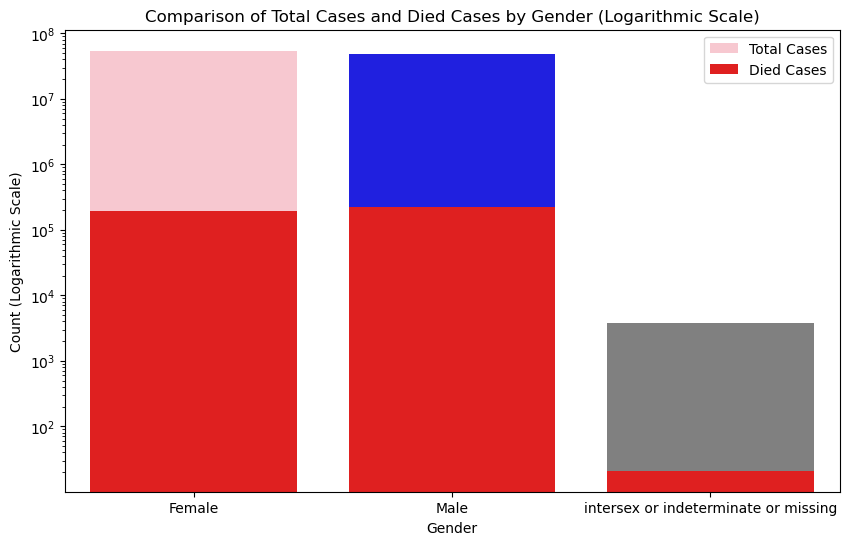

In [31]:

gender_data = data.groupby('Sex')[['Count of cases', 'Died_cases']].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Count of cases', data=gender_data, palette=colors, label='Total Cases', log=True)
sns.barplot(x='Sex', y='Died_cases', data=gender_data, color='red', label='Died Cases', log=True)
plt.title('Comparison of Total Cases and Died Cases by Gender (Logarithmic Scale)')
plt.xlabel('Gender')
plt.ylabel('Count (Logarithmic Scale)')
plt.legend()
plt.show()


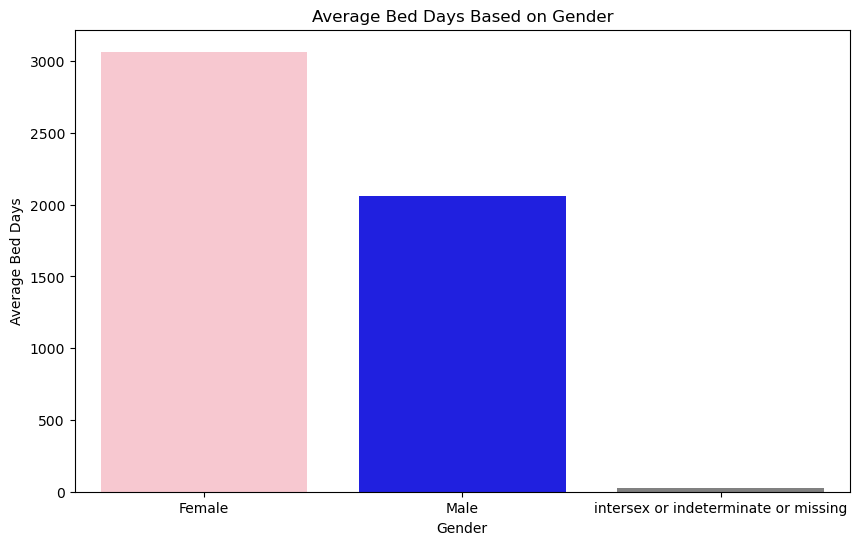

In [32]:

gender_bed_days = data.groupby('Sex')['Bed days'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Bed days', data=gender_bed_days,palette=colors, color='green',estimator=sum)
plt.title('Average Bed Days Based on Gender')
plt.xlabel('Gender')
plt.ylabel('Average Bed Days')
plt.show()


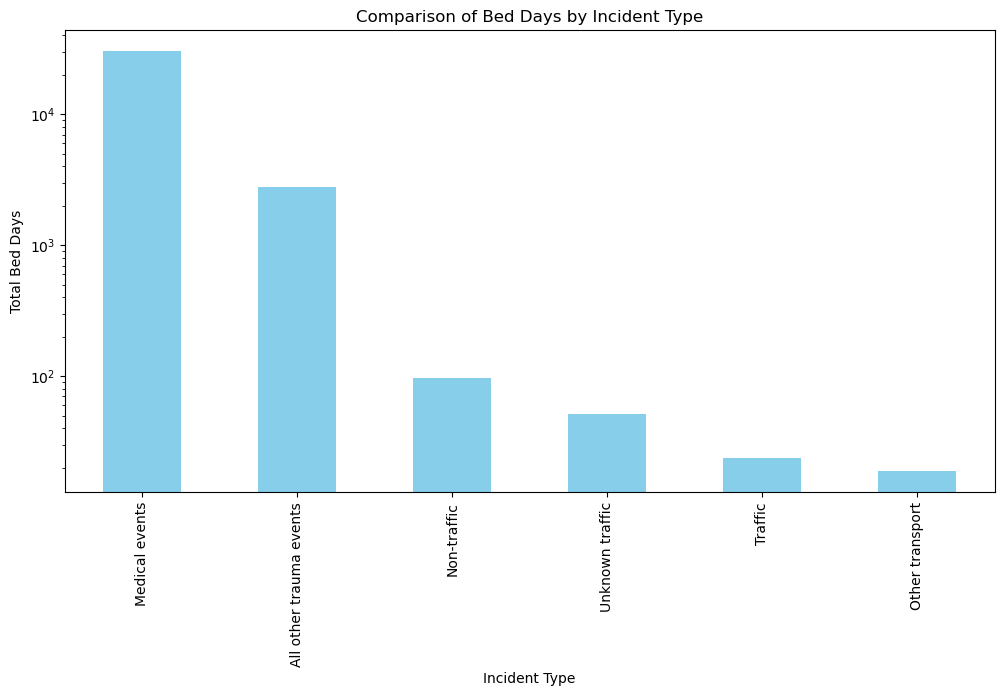

In [33]:

bed_days_by_incident = data.groupby('Cause of injury')['Bed days'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
bed_days_by_incident.plot(kind='bar', color='skyblue')
plt.title('Comparison of Bed Days by Incident Type')
plt.xlabel('Incident Type')
plt.ylabel('Total Bed Days')
plt.yscale('log')
plt.show()


In [34]:

label_encoder = LabelEncoder()
data['Month'] = label_encoder.fit_transform(data['Month'])
data['ABS remoteness area'] = label_encoder.fit_transform(data['ABS remoteness area'])
data['Cause of injury'] = label_encoder.fit_transform(data['Cause of injury'])
data['Age group'] = label_encoder.fit_transform(data['Age group'])
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['Road user'] = label_encoder.fit_transform(data['Road user'])
data['Counterparty'] = label_encoder.fit_transform(data['Counterparty'])




In [35]:
data.head(1000)

,Calendar year,Month,ABS remoteness area,Cause of injury,Age group,Sex,Road user,Counterparty,Count of cases,Bed days,Died_cases,Died_bed_days,Hospitalisations
0,2011,0,0,0,0,0,8,5,765.0,1007,0.0,0.0,765
1,2011,0,0,0,0,1,8,5,1010.0,1694,0.0,0.0,1010
2,2011,0,0,0,1,0,8,5,859.0,1597,0.0,0.0,859
3,2011,0,0,0,1,1,8,5,2231.0,3878,2.0,3.0,2229
4,2011,0,0,0,2,0,8,5,1098.0,2347,1.0,14.0,1097
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,2011,1,0,4,2,1,1,4,10.0,36,0.0,0.0,10
1024,2011,1,0,4,2,1,1,6,3.0,7,0.0,0.0,3
1025,2011,1,0,4,2,1,2,1,8.0,47,0.0,0.0,8
1026,2011,1,0,4,2,1,2,2,4.0,10,0.0,0.0,4


# Clustring

In [36]:
km = KMeans(n_clusters=2)
clusters = km.fit_predict(data)
y = km.fit_predict(data)
print(y[:1000])
print(pd.Series(y).value_counts())


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [37]:
unique_labels, counts = np.unique(y, return_counts=True)
for y, count in zip(unique_labels, counts):
    print(f"Cluster {y}: {count} samples")

Cluster 0: 111458 samples
Cluster 1: 1524 samples


In [38]:


correlation_matrix = data.corr()

print(correlation_matrix)


                     Calendar year     Month  ABS remoteness area  \
Calendar year             1.000000  0.000525            -0.009284   
Month                     0.000525  1.000000            -0.000546   
ABS remoteness area      -0.009284 -0.000546             1.000000   
Cause of injury          -0.008458  0.000826            -0.102219   
Age group                 0.010162 -0.001582            -0.012854   
Sex                       0.012978  0.001505             0.012712   
Road user                 0.014931 -0.002994            -0.005000   
Counterparty             -0.001393  0.000639             0.052250   
Count of cases            0.009240  0.003047            -0.069568   
Bed days                  0.003893  0.002784            -0.071736   
Died_cases               -0.026692 -0.000677            -0.043317   
Died_bed_days            -0.024377 -0.000671            -0.044446   
Hospitalisations          0.009441  0.003063            -0.069566   

                     Cause of inj

In [39]:
data['Died_cases'].value_counts()


0.0      103241
1.0        4060
2.0         960
3.0         553
4.0         412
          ...  
445.0         1
636.0         1
996.0         1
565.0         1
677.0         1
Name: Died_cases, Length: 533, dtype: int64

# Classification

In [40]:

data['Outcome'] = [1 if x > data['Died_cases'].all() else 0 for x in data['Died_cases']]

data['Outcome'].value_counts()


0    103241
1      9741
Name: Outcome, dtype: int64

Learn with Random Forest

In [41]:
 
features = ['ABS remoteness area','Age group','Sex','Road user',]

X = data[features]
y = data['Outcome']

X_train, X_test , y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('\nClassification Report:\n', classification_rep)



Accuracy: 0.9143249103863345

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     20664
           1       0.48      0.02      0.03      1933

    accuracy                           0.91     22597
   macro avg       0.70      0.51      0.49     22597
weighted avg       0.88      0.91      0.88     22597



Learn with decesion tree

Accuracy: 91.43%


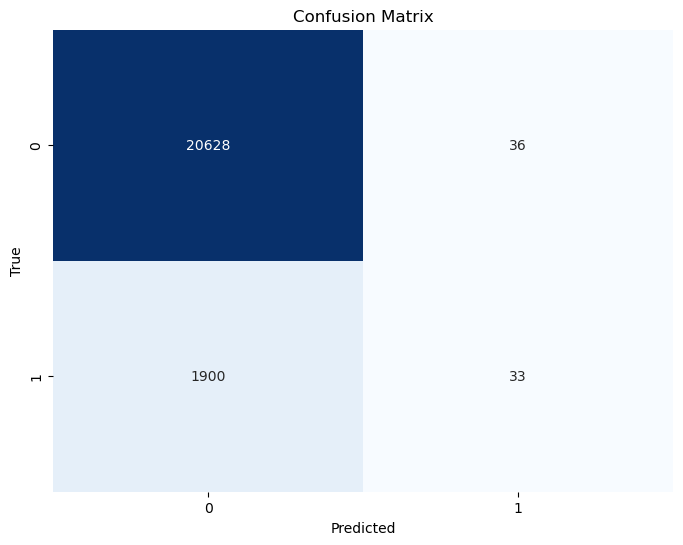

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     20664
           1       0.48      0.02      0.03      1933

    accuracy                           0.91     22597
   macro avg       0.70      0.51      0.49     22597
weighted avg       0.88      0.91      0.88     22597



In [42]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2%}')

conf_matrix = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

class_report = classification_report(y_test, predictions)
print(class_report)


LEarn with Logestic Regresion

Logistic Regression Accuracy: 91.45%


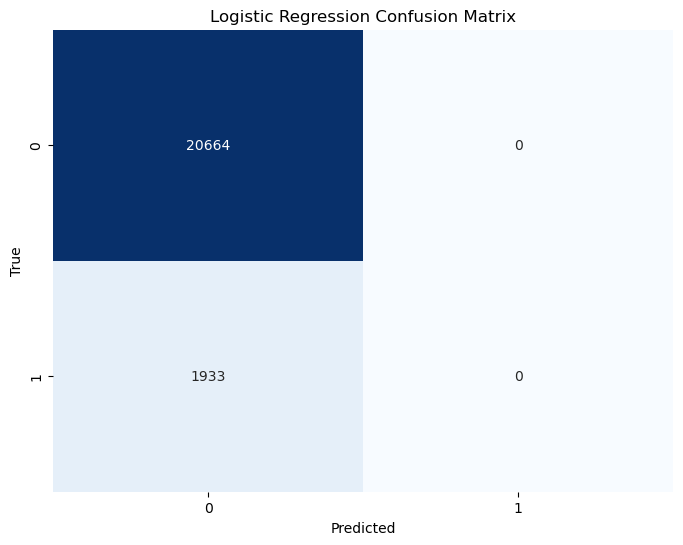

              precision    recall  f1-score   support

           0       0.91      1.00      0.96     20664
           1       0.00      0.00      0.00      1933

    accuracy                           0.91     22597
   macro avg       0.46      0.50      0.48     22597
weighted avg       0.84      0.91      0.87     22597



/Users/amin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/amin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/amin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

logreg_predictions = logreg_model.predict(X_test)

logreg_accuracy = accuracy_score(y_test, logreg_predictions)
print(f'Logistic Regression Accuracy: {logreg_accuracy:.2%}')

logreg_conf_matrix = confusion_matrix(y_test, logreg_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(logreg_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

logreg_class_report = classification_report(y_test, logreg_predictions)
print(logreg_class_report)


In [44]:
from sklearn.preprocessing import LabelEncoder
features = ['ABS remoteness area','Age group','Sex','Road user',]

X = data[features]
y = data['Outcome']
# ایجاد یک نمونه از LabelEncoder
label_encoder = LabelEncoder()

# تبدیل برچسب‌های متنی به اعداد
y_encoded = label_encoder.fit_transform(y)

# استفاده از y_encoded به جای y در سایر بخش‌های کد

# جدا کردن داده‌ها به دو قسمت آموزش و آزمون
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# ایجاد مدل XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# پیش‌بینی بر روی داده‌های آزمون
y_pred = xgb_model.predict(X_test)

# ارزیابی عملکرد مدل
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)

plt.figure(figsize=(8, 6))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('xg boost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

NameError: name 'XGBClassifier' is not defined

In [ ]:
import pandas as pd

# تبدیل آرایه NumPy به یک سری داده Pandas
y_series = pd.Series(y_encoded)

# اعمال تابع value_counts بر روی سری داده
value_counts_result = y_series.value_counts()

# چاپ نتیجه
print(value_counts_result)


# meta cost

In [ ]:
from Meta import MetaCost


In [ ]:
cost_matrix = np.array([[0,199],[3800,0]])
cost_matrix

In [ ]:
metacost_ = MetaCost(estimator=xgb_model,cost_matrix=cost_matrix,n_estimators=50,n_samples=None,p=True,q=True)


In [ ]:
X = data[features]
y = data['Outcome']
import pandas as pd

# تبدیل y به یک دیتافریم pandas
y_df = pd.DataFrame(y_train, columns=['Outcome'])


# تبدیل آرایه NumPy به DataFrame
df_train = pd.DataFrame(X_train, columns=features)
df_train['Outcome'] = y_train

# اجرای مدل
metacost.fit(df_train[features], df_train['Outcome'])




In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X = data[['Count of cases', 'Died_cases', 'Hospitalisations','ABS remoteness area','Month','Counterparty','Died_bed_days','Calendar year',]] 
y = data['Bed days'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

predictions = linear_model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

plt.scatter(y_test, predictions)
plt.xlabel('Actual Bed days')
plt.ylabel('Predicted Bed days')
plt.title('Actual vs. Predicted Bed days')
plt.show()


In [ ]:
import pandas as pd

results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

print(results_df[:100])


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

X = data[['Count of cases', 'Died_cases', 'Hospitalisations','Bed days']]
y = data['Bed days']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

predictions = rf_model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

plt.scatter(y_test, predictions)
plt.xlabel('Actual Bed days')
plt.ylabel('Predicted Bed days')
plt.title('Actual vs. Predicted Bed days (RandomForestRegressor)')
plt.show()


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

X = data[['Count of cases', 'Died_cases', 'Hospitalisations']]
y = data['Bed days']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.3, max_depth=30, random_state=42)
gb_model.fit(X_train, y_train)

predictions = gb_model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

plt.scatter(y_test, predictions)
plt.xlabel('Actual Bed days')
plt.ylabel('Predicted Bed days')
plt.title('Actual vs. Predicted Bed days')
plt.show()


In [ ]:
data['Bed_days_category'] = np.where(data['Bed days'] < 30, 'Less than 30 days', '30 days or more')
data['Bed_days_category'].value_counts()

In [ ]:
data['Bed_days_category'] = np.where(data['Bed days'] >= 30, 1, 0)
data['Bed_days_category'].value_counts()

In [ ]:
from sklearn.model_selection import train_test_split



X = data[['ABS remoteness area','Age group','Sex','Road user','Cause of injury']]

y = data['Bed_days_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
data['Bed_days_category'] = np.where(data['Bed days'] >= 30, 1, 0)

logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

y_pred_logreg = logreg_model.predict(X_test)

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
class_report_logreg = classification_report(y_test, y_pred_logreg)

print(f'Accuracy (Logistic Regression): {accuracy_logreg:.4f}')
print('\nConfusion Matrix (Logistic Regression):')
print(conf_matrix_logreg)
print('\nClassification Report (Logistic Regression):')
print(class_report_logreg)


In [ ]:
data['Bed_days_category'] = np.where(data['Bed days'] >= 30, 1, 0)
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)

print(f'Accuracy (XGBoost): {accuracy_xgb:.4f}')
print('\nConfusion Matrix (XGBoost):')
print(conf_matrix_xgb)
print('\nClassification Report (XGBoost):')
print(class_report_xgb)


In [ ]:
data['Bed days'].value_counts()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# فرض می‌کنیم که داده‌های شما در یک فایل CSV یا DataFrame موجود است.
# اگر داده‌های شما در یک DataFrame هستند:

# اطلاعات مرگ بر اساس Road user را گروه‌بندی کنید و مجموع را برای هر گروه محاسبه کنید.
death_by_road_user = data.groupby('Road user')['Died_cases'].sum().sort_values(ascending=False)

# تعداد دسته‌ها که می‌خواهید نمایش دهید.
top_n = 10

# نمودار
plt.figure(figsize=(10, 6))
death_by_road_user.head(top_n).plot(kind='bar', color='skyblue')
plt.title('Top {} Road Users with Highest Death Cases'.format(top_n))
plt.xlabel('Road User')
plt.ylabel('Total Death Cases')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# فرض می‌کنیم که داده‌ها در یک دیتافریم به نام data قرار دارند

# تعداد موارد فوت بر اساس نوع کاربر جاده
deaths_by_road_user = data.groupby('Road user')['Died_cases'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(deaths_by_road_user['Road user'], deaths_by_road_user['Died_cases'])
plt.xticks(rotation=45)
plt.xlabel('Road User')
plt.ylabel('Number of Deaths')
plt.title('Number of Deaths by Road User')

# تعداد موارد فوت بر اساس طرف مقابل
deaths_by_counterparty = data.groupby('Counterparty')['Died_cases'].sum().reset_index()

plt.subplot(1, 2, 2)
plt.bar(deaths_by_counterparty['Counterparty'], deaths_by_counterparty['Died_cases'])
plt.xticks(rotation=45)
plt.xlabel('Counterparty')
plt.ylabel('Number of Deaths')
plt.title('Number of Deaths by Counterparty')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# بارگذاری داده ها

# ایجاد جدول فراوانی دو بعدی
freq_table = pd.crosstab(data['ABS remoteness area'], data['Road user'])

# نرمالیزه کردن فراوانی ها به درصد در هر منطقه
freq_table_pct = freq_table.div(freq_table.sum(1), axis=0) * 100

# رسم نمودار میله ای
freq_table_pct.plot(kind='bar', figsize=(12, 6), stacked=True)
plt.xlabel('Remoteness Area')
plt.ylabel('Percentage of Road Users')
plt.title('Road User Distribution by Remoteness Area')
plt.legend(title='Road User', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# بارگذاری داده ها

# رسم نمودار باکس پلات روزهای بستری بر اساس گروه سنی
plt.figure(figsize=(10, 6))
data.boxplot(column='Bed days', by='Age group')
plt.title('Distribution of Bed Days by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Bed Days')
plt.xticks(rotation=45)
plt.show()

# رسم نمودار باکس پلات روزهای بستری بر اساس جنسیت
plt.figure(figsize=(6, 6))
data.boxplot(column='Bed days', by='Sex')
plt.title('Distribution of Bed Days by Sex')
plt.xlabel('Sex')
plt.ylabel('Bed Days')
plt.show()

# رسم نمودار باکس پلات روزهای بستری بر اساس علت آسیب
plt.figure(figsize=(10, 6))
data.boxplot(column='Bed days', by='Cause of injury')
plt.title('Distribution of Bed Days by Cause of Injury')
plt.xlabel('Cause of Injury')
plt.ylabel('Bed Days')
plt.xticks(rotation=45)
plt.show()